# 랜덤 포레스트

랜덤 포레스트는 앙상블 학습의 대표주자, 앙상블 학습은 정형 데이터에서 가장 뛰어난 성능을 보임.

랜덤 포레스트는 결정트리의 숲을 만들고, 각 결정트리의 예측을 사용해 최종 예측을 만든다.

**부트스트랩 샘플**
- 부트스트랩 방식이란, 데이터 세트에서 중복을 허용하여 데이터를 샘플링하는것.
- 기본적으로 훈련세트의 크기와 같게 만든다.

랜덤 포레스트에서는 부트스트랩 샘플을 하여 각 노드를 만든다.

- `RandomForestClassifier` 모델에서는 각 노드에서는 전체 특성 개수의 제곱근개수 만큼 특성을 선택하여 최선의 분할을 찾는다.
- `RandomForestRegressor`  모델에서는 전체 특성을 사용한다.

사이킷런의 랜덤 포레스트는 기본적으로 100개의 결정트리를 이런 방식으로 훈련한다. 분류일 때는 각 트리의 클래스별 확률을 평가하여 가장 높은 확률을 가진 클래스를 예측으로 삼는다. 회귀일 떄는 각 트리의 예측을 평균한다.

랜덤 포레스트의 장점
- 랜덤하게 선택된 특성과 샘플을 사용하기 때문에 과대적합을 막아준다.
- 기본 매개변수 설정만으로도 아주 좋은 결과를 낸다.

## RadnomForestClassifier 모델

In [2]:
# 데이터 준비
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')


wine_feature = wine.iloc[:, :3]
wine_target = wine.iloc[:, 3]

train_input, test_input, train_target, test_target = train_test_split(wine_feature, wine_target, test_size=0.2, random_state=42)

교차 검증을 통하여 랜덤포레스트분류 모델훈련

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42) # 기본적으로 100개의 결정 트리를 사용한다.
scores = cross_validate(rf, train_input, train_target, n_jobs=-1, return_train_score=True)

In [4]:
scores

{'fit_time': array([0.3855083 , 0.38106728, 0.35852003, 0.37473917, 0.35993099]),
 'score_time': array([0.09986329, 0.06573033, 0.0669899 , 0.05735373, 0.07371473]),
 'test_score': array([0.88461538, 0.88942308, 0.90279115, 0.88931665, 0.88642926]),
 'train_score': array([0.9971133 , 0.99663219, 0.9978355 , 0.9973545 , 0.9978355 ])}

출력 정보를 보면 과대적합된것을 볼 수 있다.

랜덤 포레스트는 결정트리의 앙상블이기 때문에 매개변수나 어트리뷰트를 공유한다.

In [5]:
rf.fit(train_input, train_target)
print(rf.score(train_input, train_target))
print(rf.feature_importances_) 

0.996921300750433
[0.23167441 0.50039841 0.26792718]


랜덤 포레스트는 결정트리에 비해 비교적 고른 중요도를 보인다. 과대적합을 줄이고 일반화 성능을 높아진다.

랜덤 포레스트에서는 부트스트랩 샘플에 포함되지 않은 데이터셋으로 교차검증 비슷한것을 할 수 있다.

이런것을 oob sample이라고 한다.

In [6]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42, oob_score=True)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


oob sample, oob score로 교차검증을 대신할 수 있다.

## 엑스트라 트리

액스트라 트리에서는 전체 데이터를 사용하여 노드를 만든다. 하지만 노드를 분리할때 랜덤으로 분리한다.

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(scores)

{'fit_time': array([0.21439743, 0.22685647, 0.20179033, 0.21993923, 0.22194338]), 'score_time': array([0.03996396, 0.03578782, 0.05614662, 0.03679395, 0.03579283]), 'test_score': array([0.88365385, 0.87884615, 0.90375361, 0.88835419, 0.88931665]), 'train_score': array([0.9971133 , 0.99663219, 0.998076  , 0.997595  , 0.9978355 ])}


In [8]:
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
et.fit(train_input, train_target)
et.feature_importances_

array([0.20183568, 0.52242907, 0.27573525])

## 그래디언트 부스팅
그래디언트 부스팅에선 깊이가 얕은 트리를 사용하여 점진적으로 학습시킨다.

여러개의 약한 학습기를 손실함수가 감소하는 방향으로 학습시킨다.

- 분류할 때 손실함수를 기준으로 분류한다. 손실함수의 감소가 최대화 되는 기준으로 분류한다.
- 기본적으로 깊이가 3인 결정트리를 100개 사용한다
- 깊이가 얕은 결정트리를 사용하기 때문에 과대적합에 강하고 일반화 성능이 높다.

각 트리(학습기)는 손실 함수의 그래디언트를 줄이는 방향으로 학습되며, 

따라서 각 노드의 value는 잔차의 보정 값이나 예측 확률의 조정을 나타낼 수 있습니다. 

분류 문제에서 이는 각 클래스에 대한 로그 오즈(log odds)의 변화 또는 예측 확률의 수정을 반영할 수 있습니다.

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs= -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [27]:
# 결정트리를 500개로
gb = GradientBoostingClassifier(random_state=42, n_estimators=500, learning_rate=0.2) # 학습률의 기본값은 0.1
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs= -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


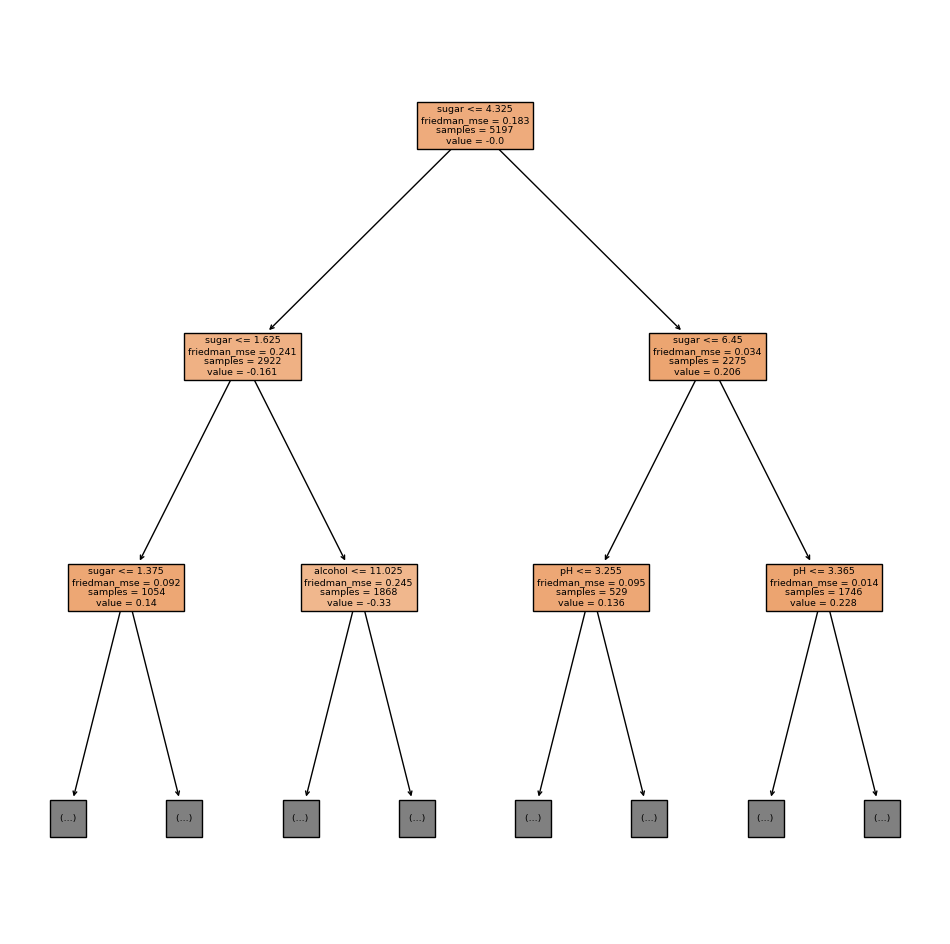

In [31]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
gb.fit(train_input, train_target)

plt.figure(figsize=(12,12))
plot_tree(gb.estimators_[0, 0], max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

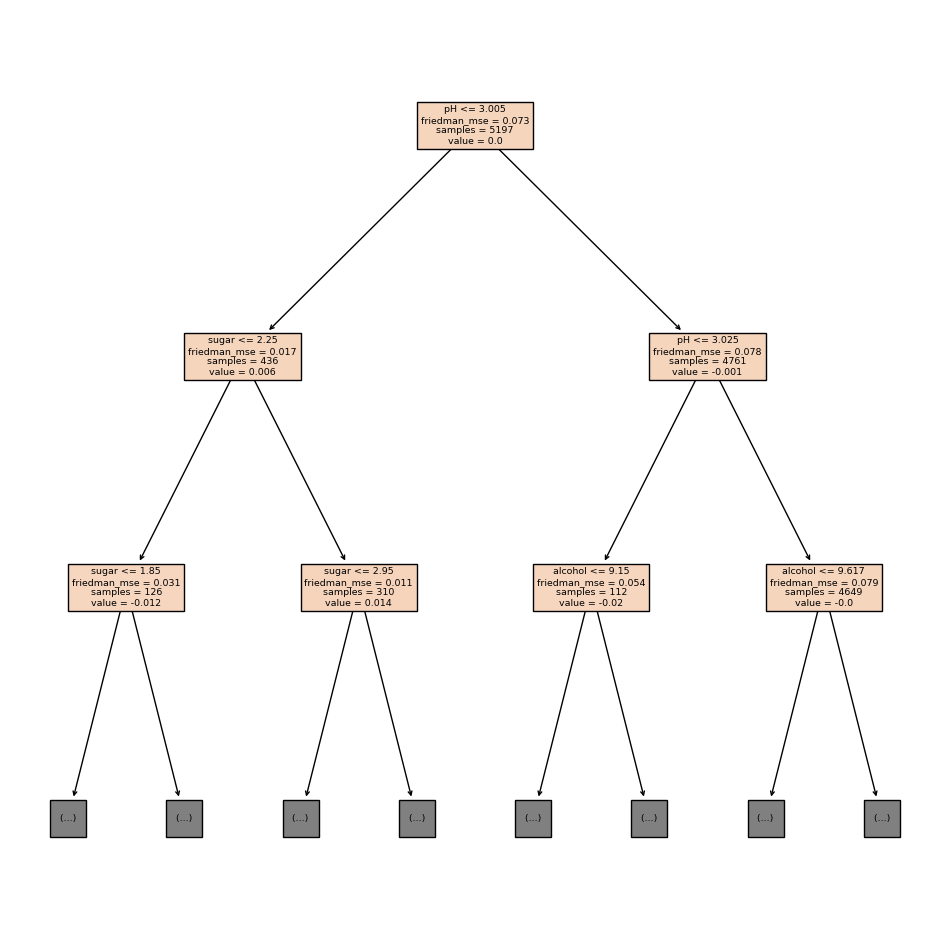

In [34]:
plt.figure(figsize=(12,12))
plot_tree(gb.estimators_[100, 0], max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## 히스토그램 기반 그래디언트 부스팅
입력특성을 256개의 구간으로 나누고 노드를 분할한다.

장점 :
- 계산 효율성: 전통적인 그래디언트 부스팅 방식에 비해, 히스토그램 기반 방식은 각 분할을 결정할 때 더 적은 계산을 필요로 합니다. 이는 각 트리를 구축하는 데 필요한 시간을 크게 단축시킵니다.

- 메모리 효율성: 데이터를 미리 정의된 구간으로만 처리하기 때문에, 원본 데이터의 고정된 표현을 메모리에 저장할 수 있으며, 이는 메모리 사용량을 줄입니다.

- 스케일 민감도 감소: 히스토그램 기반 방식은 입력 특성의 스케일에 덜 민감합니다. 구간화 과정에서 값의 절대 크기보다는 데이터의 분포가 더 중요하기 때문입니다.

사이킷런의 히스토그램 기반 그레디언트 부스팅
- `HistGradientBosstingClassfier`
- 기본 매개변수에서 안정적인 

In [37]:
from sklearn.ensemble import HistGradientBoostingClassifier


hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, n_jobs=-1, return_train_score=True)
print(scores['train_score'].mean(), scores['test_score'].mean())

0.9321723946453317 0.8801241948619236
